In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Wczytanie danych - plik csv
df = pd.read_csv('smart_grid_stability_augmented.csv')
# Dane pobrane z: https://www.kaggle.com/datasets/pcbreviglieri/smart-grid-stability

In [4]:
# Rzut okiem na dane
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    60000 non-null  float64
 1   tau2    60000 non-null  float64
 2   tau3    60000 non-null  float64
 3   tau4    60000 non-null  float64
 4   p1      60000 non-null  float64
 5   p2      60000 non-null  float64
 6   p3      60000 non-null  float64
 7   p4      60000 non-null  float64
 8   g1      60000 non-null  float64
 9   g2      60000 non-null  float64
 10  g3      60000 non-null  float64
 11  g4      60000 non-null  float64
 12  stab    60000 non-null  float64
 13  stabf   60000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 6.4+ MB


In [6]:
# Mamy 14 kolumn - typ liczowy oraz object. Ramka nie posiada wartości odstających.

In [7]:
# Przewidujemy wartości z kolumny stabf - są typu object

In [8]:
df['stabf'].unique()

array(['unstable', 'stable'], dtype=object)

In [9]:
# Zamieniamy 0 - unstable, 1 - stable

In [10]:
df['stabf'] = df['stabf'].apply(lambda m: 0 if m=='unstable' else 1)

In [11]:
df['stabf'].unique()

array([0, 1], dtype=int64)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    60000 non-null  float64
 1   tau2    60000 non-null  float64
 2   tau3    60000 non-null  float64
 3   tau4    60000 non-null  float64
 4   p1      60000 non-null  float64
 5   p2      60000 non-null  float64
 6   p3      60000 non-null  float64
 7   p4      60000 non-null  float64
 8   g1      60000 non-null  float64
 9   g2      60000 non-null  float64
 10  g3      60000 non-null  float64
 11  g4      60000 non-null  float64
 12  stab    60000 non-null  float64
 13  stabf   60000 non-null  int64  
dtypes: float64(13), int64(1)
memory usage: 6.4 MB


In [14]:
# Sprawdźmy bilnas klas. Zmienna przewidywana to stabf, które zgodnie z opisem:
# System's stability label (categorical: stable / unstable), 0 - unstable, 1 - stable

In [15]:
df['stabf'].value_counts()

0    38280
1    21720
Name: stabf, dtype: int64

In [16]:
# Klasy są nieco niezbilansowane (duzo więcej danych dla klasy 0)

In [17]:
# Dzielimy dane na uczące i testowe (0.75 - 0.25)

In [18]:
X = df.drop(columns= ['stabf'])

In [19]:
Y = df['stabf']

In [20]:
# Import skaleera oraz funkcji dzielącej dane
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [21]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state=1) 

In [22]:
# Skalowanie danych

In [23]:
minMax = MinMaxScaler()
x_train_scaled = minMax.fit_transform(x_train)
x_test_scaled = minMax.transform(x_test)

In [24]:
# Sieć neuronowa

In [27]:
import tensorflow as tf
# Warstwa wejściowa
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(20, activation='relu', input_shape=(x_train_scaled.shape[1], )))
# Dwie ukryte warstwy
model.add(tf.keras.layers.Dense(15, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='relu'))
# Wyjście
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:
# Trening
history = model.fit(x_train_scaled, y_train, validation_data=(x_test_scaled, y_test), epochs=15, verbose=1)

Epoch 1/15
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1394/1407 [============================>.] - ETA: 0s - loss: 0.3491 - accuracy: 0.8265WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000001D8116FF4C8> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=1

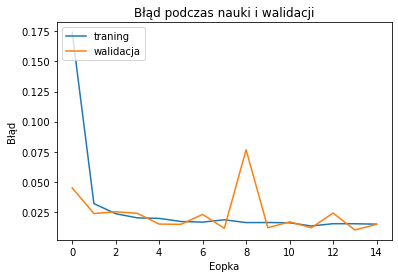

In [29]:
# Wykres błędów
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Błąd podczas nauki i walidacji')
plt.ylabel('Błąd')
plt.xlabel('Eopka')
plt.legend(['traning', 'walidacja'], loc='upper left')

In [30]:
# Dokonajmy predukcji

In [31]:
# DANE TRENINGOWE

In [32]:
pred_train = model.predict(x_train_scaled)
pred_class = [round(m[0]) for m in pred_train]

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [33]:
from sklearn.metrics import classification_report, confusion_matrix

In [34]:
# Macierz pomyłek

In [35]:
cf_matrix_train = confusion_matrix(y_train, pred_class)

In [36]:
y_train.value_counts()

0    28786
1    16214
Name: stabf, dtype: int64

In [37]:
cf_matrix_train

array([[28529,   257],
       [    2, 16212]], dtype=int64)

In [38]:
tn_train, fp_train, fn_train, tp_train = cf_matrix_train.ravel()

In [39]:
tn_train

28529

In [40]:
fp_train

257

In [41]:
fn_train

2

In [42]:
tp_train

16212

In [43]:
# Raport z klasyfikacji

In [44]:
print(classification_report(y_train, pred_class))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     28786
           1       0.98      1.00      0.99     16214

    accuracy                           0.99     45000
   macro avg       0.99      1.00      0.99     45000
weighted avg       0.99      0.99      0.99     45000



In [45]:
# DANE TESTOWE
pred_test = model.predict(x_test_scaled)
pred_class_test = [round(m[0]) for m in pred_test]

In [46]:
cf_matrix_test = confusion_matrix(y_test, pred_class_test)

In [47]:
y_test.value_counts()

0    9494
1    5506
Name: stabf, dtype: int64

In [48]:
cf_matrix_test

array([[9390,  104],
       [   0, 5506]], dtype=int64)

In [49]:
tn_test, fp_test, fn_test, tp_test = cf_matrix_test.ravel()

In [50]:
tn_test

9390

In [51]:
fp_test

104

In [52]:
fn_test

0

In [53]:
tp_test

5506

In [54]:
# Raport z klasyfikacji

In [55]:
print(classification_report(y_test, pred_class_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      9494
           1       0.98      1.00      0.99      5506

    accuracy                           0.99     15000
   macro avg       0.99      0.99      0.99     15000
weighted avg       0.99      0.99      0.99     15000

